<a href="https://colab.research.google.com/github/nocturneC/assignment4/blob/main/Copy_of_assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.
  7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?
  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?
  12. Which model --- linear model or classification and regression tree --- has better performance on the test set?

In [3]:
import pandas as pd
df = pd.read_csv('./data/cars_hw.csv')

In [4]:
# 1
df.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [5]:
df['Age'] = max(df['Make_Year'])-df['Make_Year'] # Convert year to age

<Axes: >

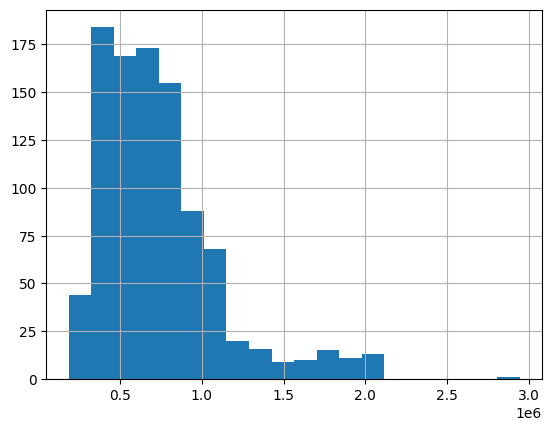

In [6]:
df['Price'].hist(bins=20)

In [7]:
print(df["Price"].describe(), '\n')
print(df["Age"].describe(), '\n')

count    9.760000e+02
mean     7.410195e+05
std      3.673234e+05
min      1.880000e+05
25%      4.757500e+05
50%      6.665000e+05
75%      8.830000e+05
max      2.941000e+06
Name: Price, dtype: float64 

count    976.000000
mean       5.036885
std        2.818742
min        0.000000
25%        3.000000
50%        5.000000
75%        7.000000
max       11.000000
Name: Age, dtype: float64 



In [8]:
import numpy as np

# Apply arcsinh transformation
df['Price_Arcsinh'] = np.arcsinh(df['Price'])

original_price_stats = df['Price'].describe()

# Display the transformed 'Price' variable statistics
arcsinh_price_stats = df['Price_Arcsinh'].describe()

print("Original 'Price' variable statistics:")
print(original_price_stats)

print("\nTransformed 'Price' variable statistics using arcsinh transformation:")
print(arcsinh_price_stats)



Original 'Price' variable statistics:
count    9.760000e+02
mean     7.410195e+05
std      3.673234e+05
min      1.880000e+05
25%      4.757500e+05
50%      6.665000e+05
75%      8.830000e+05
max      2.941000e+06
Name: Price, dtype: float64

Transformed 'Price' variable statistics using arcsinh transformation:
count    976.000000
mean      14.104181
std        0.450276
min       12.837344
25%       13.765795
50%       14.102942
75%       14.384228
max       15.587407
Name: Price_Arcsinh, dtype: float64


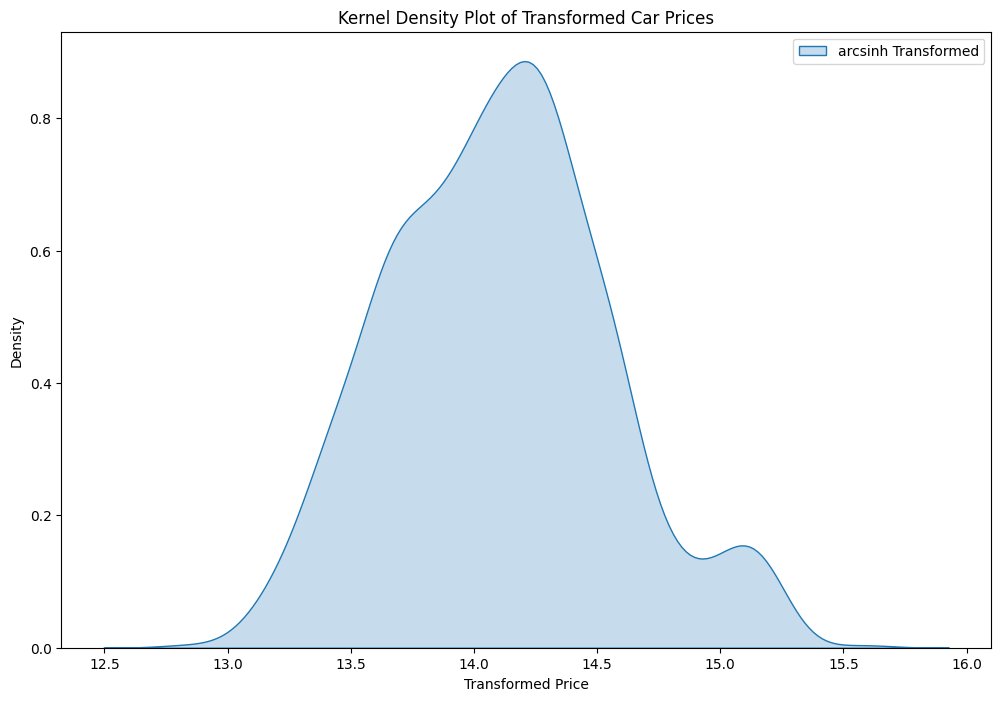

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.kdeplot(df['Price_Arcsinh'], label='arcsinh Transformed', fill=True)
plt.title('Kernel Density Plot of Transformed Car Prices')
plt.xlabel('Transformed Price')
plt.legend()
plt.show()

<Axes: >

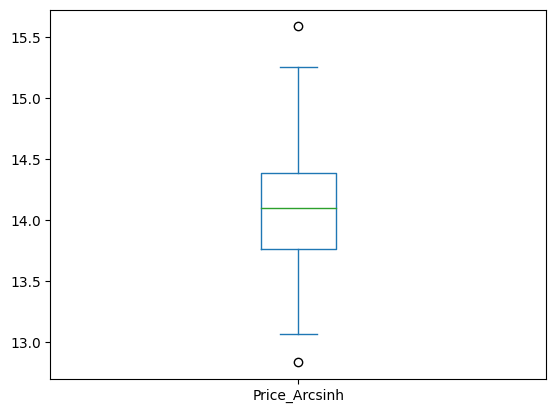

In [10]:
df['Price_Arcsinh'].plot.box()

In [11]:
df = df.loc[df['Price_Arcsinh']>13,:]
df = df.loc[df['Price_Arcsinh']<15.5,:]

<Axes: >

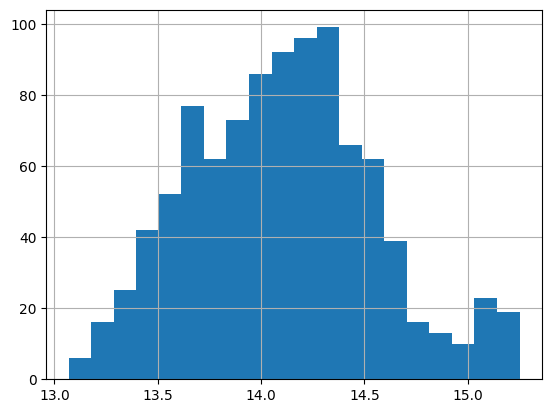

In [12]:
df['Price_Arcsinh'].hist(bins=20)

In [13]:
# 2:
#Summarize the Price variable and create a kernel density plot.
#Use .groupby() and .describe() to summarize prices by brand (Make). Make a grouped kernel density plot by Make.
# Which car brands are the most expensive? What do prices look like in general?



In [14]:
price_by_make = df.groupby('Make')['Price'].describe()
print(price_by_make)

               count          mean            std        min        25%  \
Make                                                                      
Chevrolet        6.0  4.535000e+05  246606.366503   267000.0   288500.0   
Datsun           3.0  2.896667e+05   10503.967504   279000.0   284500.0   
Ford            52.0  7.211731e+05  140927.699605   290000.0   635000.0   
Honda           73.0  7.989726e+05  266509.066586   316000.0   581000.0   
Hyundai        305.0  6.918918e+05  279159.708519   248000.0   485000.0   
Jeep             4.0  1.499500e+06  152513.387391  1290000.0  1447500.0   
Kia              8.0  1.614750e+06  119056.709177  1369000.0  1579000.0   
MG Motors       35.0  1.869457e+06  121661.135671  1589000.0  1786500.0   
Mahindra        18.0  1.100167e+06  175549.305961   796000.0  1037000.0   
Maruti Suzuki  293.0  5.887850e+05  216019.860943   237000.0   411000.0   
Nissan           4.0  8.842500e+05  289559.867155   475000.0   782500.0   
Renault         68.0  6.6

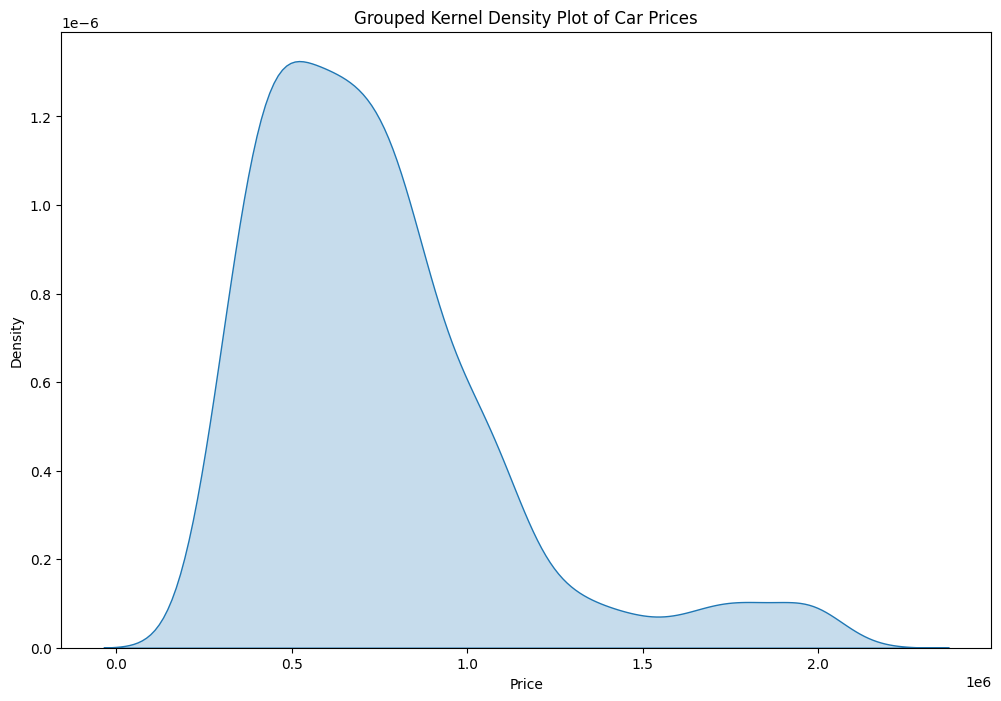

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='Price', fill=True, common_norm=False)
plt.title('Grouped Kernel Density Plot of Car Prices')
plt.xlabel('Price')
plt.show()

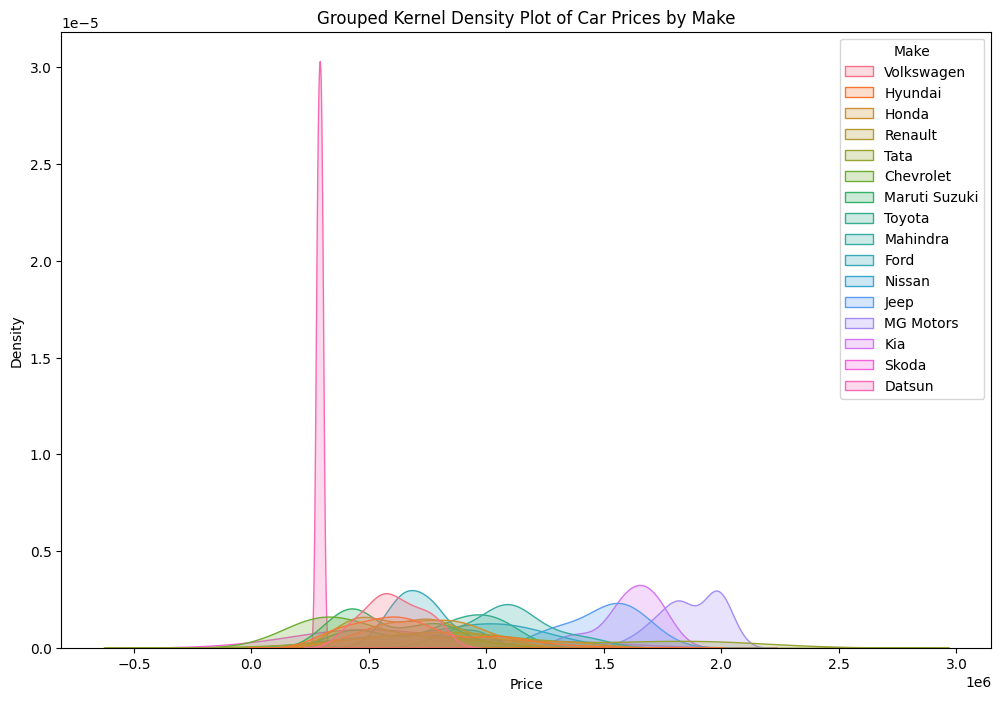

In [16]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='Price', hue='Make', fill=True, common_norm=False)
plt.title('Grouped Kernel Density Plot of Car Prices by Make')
plt.xlabel('Price')
plt.show()

In [17]:
df["Price"].describe()

count    9.740000e+02
mean     7.393285e+05
std      3.604336e+05
min      2.370000e+05
25%      4.762500e+05
50%      6.665000e+05
75%      8.827500e+05
max      2.100000e+06
Name: Price, dtype: float64

The most expensive make seems to be MG Motors, while the least expensive is Datsun. In general there seems to have the most overlap around the 0.5-1.0 area on the graph, meaning more cars have prices ranging there.

In [18]:
# 3. Split the data into an 80% training set and a 20% testing set.
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the  𝑅2  and RMSE on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the  𝑅2  and RMSE on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the  𝑅2  and RMSE on the test set? Does the joint model perform better or worse, and by home much?

In [19]:
# 4

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

# Linear Model with Numeric Variables

X_train_numeric = train_df.select_dtypes(include=np.number).drop('Price', axis=1)
y_train = train_df['Price']

X_test_numeric = test_df.select_dtypes(include=np.number).drop('Price', axis=1)
y_test = test_df['Price']

model_numeric = LinearRegression()
model_numeric.fit(X_train_numeric, y_train)

y_pred_numeric = model_numeric.predict(X_test_numeric)
r2_numeric = r2_score(y_test, y_pred_numeric)
rmse_numeric = np.sqrt(mean_squared_error(y_test, y_pred_numeric))

print(f"R2 (Numeric Model): {r2_numeric}")
print(f"RMSE (Numeric Model): {rmse_numeric}")

R2 (Numeric Model): 0.9113031646040286
RMSE (Numeric Model): 98826.71735516867


In [20]:
# Linear Model with One-Hot Encoded Categorical Variables
X_train_categorical = pd.get_dummies(train_df.select_dtypes(include='object'))
X_test_categorical = pd.get_dummies(test_df.select_dtypes(include='object'))

X_test_categorical = X_test_categorical.reindex(columns=X_train_categorical.columns, fill_value=0)

model_categorical = LinearRegression()
model_categorical.fit(X_train_categorical, y_train)

y_pred_categorical = model_categorical.predict(X_test_categorical)
r2_categorical = r2_score(y_test, y_pred_categorical)
rmse_categorical = np.sqrt(mean_squared_error(y_test, y_pred_categorical))

print(f"R2 (Categorical Model): {r2_categorical}")
print(f"RMSE (Categorical Model): {rmse_categorical}")

R2 (Categorical Model): 0.6859730111851536
RMSE (Categorical Model): 185953.2593217708


The linear model with numeric variables performed better, as it had a high R2 and lower RMSE.

In [21]:
X_train_combined = pd.concat([X_train_numeric, X_train_categorical], axis=1)
X_test_combined = pd.concat([X_test_numeric, X_test_categorical], axis=1)

model_combined = LinearRegression()
model_combined.fit(X_train_combined, y_train)

# Evaluate the model on the test set
y_pred_combined = model_combined.predict(X_test_combined)
r2_combined = r2_score(y_test, y_pred_combined)
rmse_combined = np.sqrt(mean_squared_error(y_test, y_pred_combined))

print(f"R2 (Combined Model): {r2_combined}")
print(f"RMSE (Combined Model): {rmse_combined}")

R2 (Combined Model): 0.9554284131601543
RMSE (Combined Model): 70056.64828990768


This combined model performs even better, as it has a higher R2 and lower RMSE than the numeric model.

5. Use the PolynomialFeatures function from sklearn to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the  𝑅2  and RMSE change? At what point does  𝑅2  go negative on the test set? For your best model with expanded features, what is the  𝑅2  and RMSE? How does it compare to your best model from part 3?

In [22]:
# Polynomial Features
degree = 2
poly = PolynomialFeatures(degree=degree, include_bias=False)

X_train_poly = poly.fit_transform(X_train_combined)
X_test_poly = poly.transform(X_test_combined)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Evaluate the model on the test set
y_pred_poly = model_poly.predict(X_test_poly)
r2_poly = r2_score(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

print(f"R2 (Polynomial Model, Degree={degree}): {r2_poly}")
print(f"RMSE (Polynomial Model, Degree={degree}): {rmse_poly}")

R2 (Polynomial Model, Degree=2): 0.8508086452439665
RMSE (Polynomial Model, Degree=2): 128171.69756444085


In [23]:
degree = 3
poly = PolynomialFeatures(degree=degree, include_bias=False)

X_train_poly = poly.fit_transform(X_train_combined)
X_test_poly = poly.transform(X_test_combined)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Evaluate the model on the test set
y_pred_poly = model_poly.predict(X_test_poly)
r2_poly = r2_score(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

print(f"R2 (Polynomial Model, Degree={degree}): {r2_poly}")
print(f"RMSE (Polynomial Model, Degree={degree}): {rmse_poly}")

R2 (Polynomial Model, Degree=3): 0.5947193988386259
RMSE (Polynomial Model, Degree=3): 211250.72876899486


OK so I am not sure how to go about this particular part, since I tried reusing the above code for higher degrees, like degree = 5, but it crashed the program. So I am unable to figure out when R2 becomes negative... I am sorry.

6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

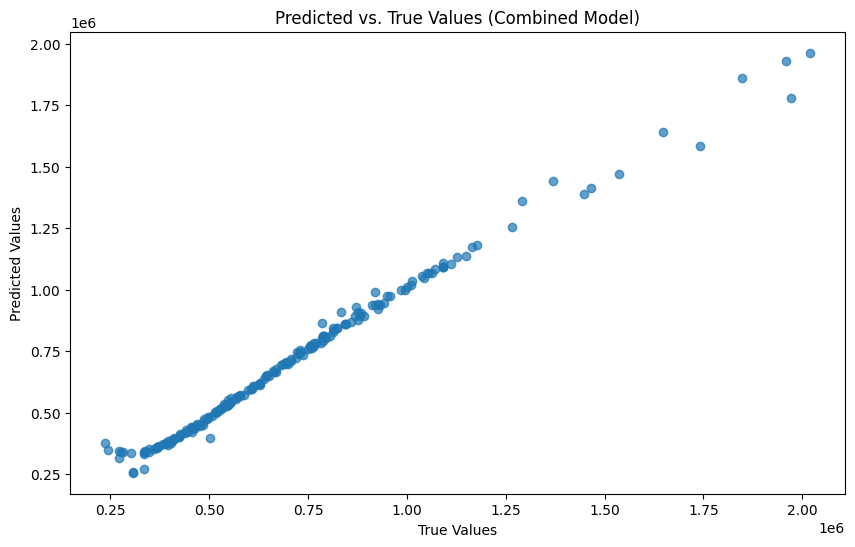

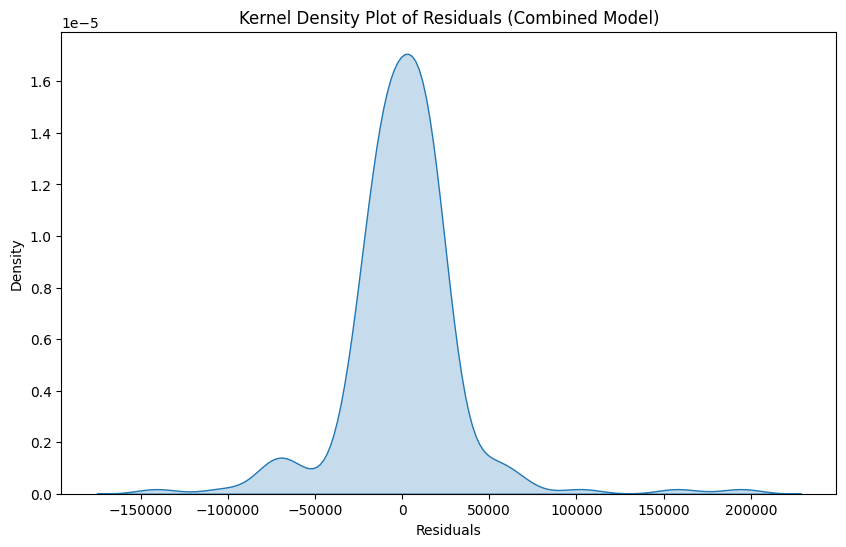

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_combined, alpha=0.7)
plt.title('Predicted vs. True Values (Combined Model)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

# Compute residuals/errors
residuals_combined = y_test - y_pred_combined

# Create a kernel density plot of residuals
plt.figure(figsize=(10, 6))
sns.kdeplot(residuals_combined, fill=True)
plt.title('Kernel Density Plot of Residuals (Combined Model)')
plt.xlabel('Residuals')
plt.show()


The plots look really good, which was expected because the R2 was really high. The second plot creates a pretty good bell shape around 0. I am not entirely sure what the weaknesses would be. It seems that combining numeric and categorical variables for regression increases accuracy.

7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the max_depth option (i.e. tree.DecisionTreeRegressor(max_depth=D)), and compute the  𝑅2  and RMSE on the test set of a variety of depths. What depth tree gives the best results?

In [ ]:
depths = [3, 5, 7, 10, 15]  # You can experiment with different depths
for depth in depths:
    tree_model = DecisionTreeRegressor(max_depth=depth)
    tree_model.fit(X_train_combined, y_train)
    y_pred_tree = tree_model.predict(X_test_combined)
    r2_tree = r2_score(y_test, y_pred_tree)
    rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
    print(f"Tree Depth={depth}, R2: {r2_tree}, RMSE: {rmse_tree}")

Tree Depth=3, R2: 0.9736912414703767, RMSE: 53823.320246399155
Tree Depth=5, R2: 0.9982223397961965, RMSE: 13990.868753343795
Tree Depth=7, R2: 0.9998472772191407, RMSE: 4100.834279476304
Tree Depth=10, R2: 0.9997710026655934, RMSE: 5021.523749569097
Tree Depth=15, R2: 0.9999124912352116, RMSE: 3104.1741954821796


The higher the depth, the higher R2 is and the lower the RMSE is. So, in this case, 15 has the best results.

8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?


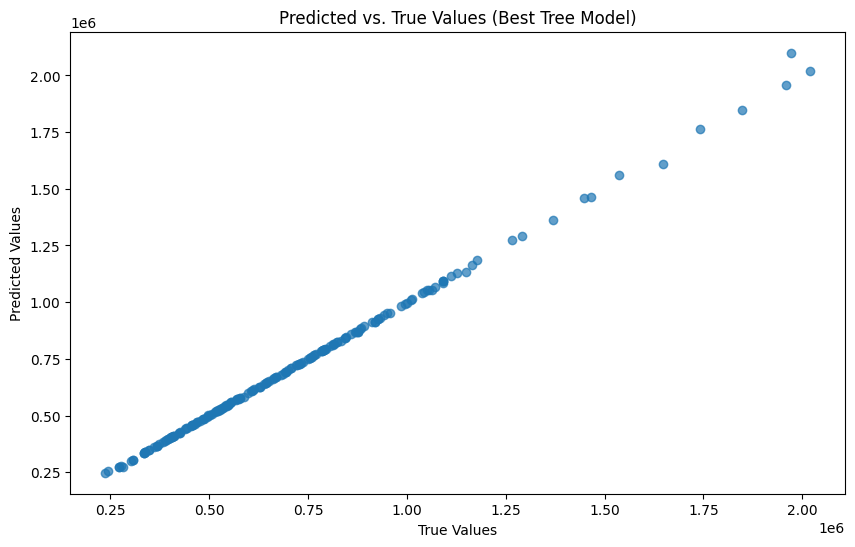

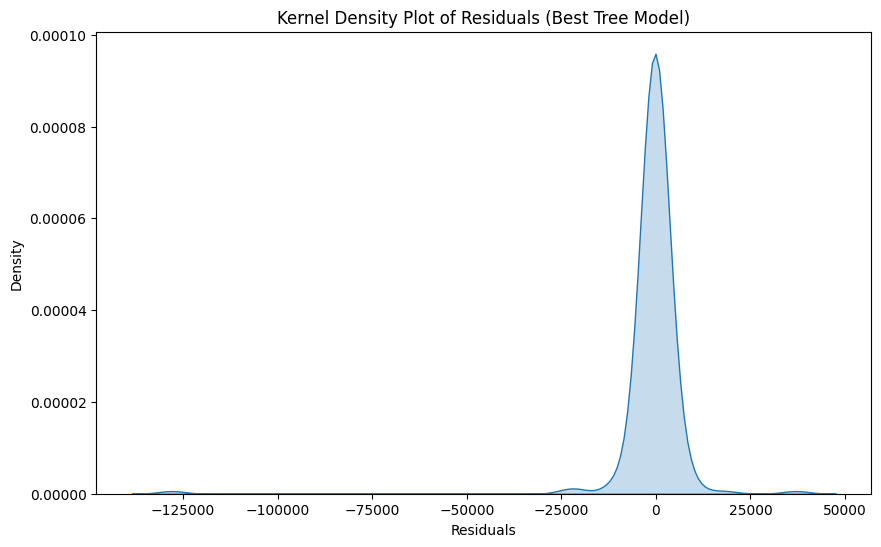

In [ ]:
best_depth = 15  # You can use the depth that gives the best results
best_tree_model = DecisionTreeRegressor(max_depth=best_depth)
best_tree_model.fit(X_train_combined, y_train)
y_pred_best_tree = best_tree_model.predict(X_test_combined)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_tree, alpha=0.7)
plt.title('Predicted vs. True Values (Best Tree Model)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

# Compute residuals and create a kernel density plot
residuals = y_test - y_pred_best_tree

plt.figure(figsize=(10, 6))
sns.kdeplot(residuals, fill=True)
plt.title('Kernel Density Plot of Residuals (Best Tree Model)')
plt.xlabel('Residuals')
plt.show()

The density plot does create a bell shape around 0.

9. Which model --- linear model or classification and regression tree --- has better performance on the test set?

It seems like the regression tree has better performance on the test set, as a depth of 15 has a really high R2.

**Q2.** The is a question about regression using decision trees and linear models. The data include wages at data science-y jobs, including

  - `Rating`: Company worker happiness score
  - `Size`: Number of employees
  - `Sector`: Part of the economy
  - `avg_salary`: Average wage
  - `job_state`: Location of work

  1. Load the `wages_hw.csv` file. Split the sample into an ~80% training set and a ~20% test set. Do any necessary cleaning, including outliers and missings.
  2. Use a linear model to regress `avg_salary` on `Sector`. Which sectors have the highest predicted wages? What is the $R^2$ and `RMSE` on the test set?
  3. Make a scatterplot of `avg_salary` and `Rating`. Is there an obvious visual relationship between the two variables? Regress `avg_salary` on `Rating` as a numeric variable: Do higher ratings predict higher or lower wages? Convert `Rating` to a one-hot encoded variable, with a category for each rating. Run a regression of `avg_salary` on the categorical version. How do your results change? Explain. Which version has a higher $R^2$ and lower `RMSE`?
  4. Now interact `Sector` with the categorical version of `Rating`, so your regressors are a (Sector, Rating) pair; this is a programming puzzle you'll have to think about, but using the `.PolynomialFeatures()` function on the one-hot encoded categorical variables is one option, and another is pre-processing a new variable that interacts `Sector` and `Rating` and then one-hot encoding the result. Regress `avg_salary` on the (Sector, Rating) pairs. How does the $R^2$ and `RMSE` on the test set compare to part 2? Interpret the coefficients; which sector-rating pairs have the highest wages?
  5. Run a linear regression of `avg_salary` on all the variables. What is the $R^2$ on the test set? How does it compare to your simpler models in 2--4?
  6. Build a decision tree by regressing `avg_salary` on `Sector`, `Rating`, and the (Sector, Rating) pairs. What are the $R^2$ and `RMSE` of your models on the test set? How do your answers compare to parts 2, 3, and 4?
  7. Build a decision tree by regressing `avg_salary` on all the other variables. What is the $R^2$ and `RMSE` on the test set?
  8. Build a linear regression or decision tree using the available variables based on your own judgment. What degrees of freedom are you giving the model to predict variation in wages across company and location attributes? What is the $R^2$ and `RMSE` of your model? How does it compare to the previous ones in the question? Why does yours perform better or worse on the test set?

**Q3.** This a question purely on categorical prediction. The data for this happen to be gathered in 1987 in Indonesia, and concern contraceptive method choice. The questions and data-gathering assumptions reflect the culture and attitudes of that time and place, but provide a good example of a categorical prediction problem on an important topic (family planning and maternal health The variables in the data are:

    - Wife's age (numerical)
    - Wife's education (categorical) 1=low, 2, 3, 4=high
    - Husband's education (categorical) 1=low, 2, 3, 4=high
    - Number of children ever born (numerical)
    - Wife's religion (binary) 0=Non-Islam, 1=Islam
    - Wife's now working? (binary) 0=Yes, 1=No
    - Husband's occupation (categorical) 1, 2, 3, 4
    - Standard-of-living index (categorical) 1=low, 2, 3, 4=high
    - Media exposure (binary) 0=Good, 1=Not good
    - Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-termhort-term

  1. Load the `contraceptiveMethodChoice.csv` data. Tabulate the `method` variable (i.e. `.value_counts()`). 1 corresponds to `No Contraception`, 3 corresponds to `Short Term` (e.g. condoms, birth control pills), and 2 corresponds to `Long Term` (e.g. IUD, sterilization). Cross tabulate `method` and `numberChildren`. Do couples that use birth control tend to have more children than those who don't?
  2. Split the sample into ~80% training data and ~20% testing data.
  3. We are now going to make a mistake. Train a regression tree to predict the contraceptive method using the other variables in the data, not a classification tree. Look at the terminal nodes in the tree: What values do they take? Does that make sense? Explain clearly what has gone wrong here.
  4. Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?
  5. Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a $3 \times 3$ matrix instead of $2 \times 2$.). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.
  7. Why can't you use a linear probability model to do this exercise? Explain clearly in words.

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

data = pd.read_csv("./data/contraception_hw.csv")
data.head()



,Unnamed: 0,age,edu,edu_spouse,numberChildren,religion,working,spouse_occupation,standardOfLivingIndex,mediaExposure,method
0,1,24,2,3,3,1,1,2,3,0,1
1,2,45,1,3,10,1,1,3,4,0,1
2,3,43,2,3,7,1,1,3,4,0,1
3,4,42,3,2,9,1,1,3,3,0,1
4,5,36,3,3,8,1,1,3,2,0,1


In [8]:
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,age,edu,edu_spouse,numberChildren,religion,working,spouse_occupation,standardOfLivingIndex,mediaExposure,method
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [9]:
method_counts = data['method'].value_counts()
print("Method variable value counts:")
print(method_counts)

Method variable value counts:
1    629
3    511
2    333
Name: method, dtype: int64


In [10]:
cross_tab = pd.crosstab(data['method'], data['numberChildren'])
print("\nCross-tabulation of method and numberChildren:")
print(cross_tab)


Cross-tabulation of method and numberChildren:
numberChildren  0    1    2    3   4   5   6   7   8   9   10  11  12  13  16
method                                                                       
1               95  143  114   70  57  44  35  18  29   5   9   6   4   0   0
2                0   46   56   70  62  36  27  19   9   3   2   2   0   1   0
3                2   87  106  119  78  55  30  12   9   8   0   3   0   1   1


It seems that couples who don't use any method of contraception have the highest frequency of having 1 child. But those same types of couples also have the highest count of not having any children. The counts tend to split up more evenly as numberChildren reaches 4 and up.

In [33]:
# 2
from sklearn.model_selection import train_test_split

X = data.drop('method', axis=1)
y = data['method']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=104)



In [13]:
# 3


[Text(0.4230769230769231, 0.875, 'x[3] <= 0.5\nsquared_error = 0.763\nsamples = 1178\nvalue = 1.928'),
 Text(0.15384615384615385, 0.625, 'x[0] <= 18.0\nsquared_error = 0.096\nsamples = 81\nvalue = 1.049'),
 Text(0.07692307692307693, 0.375, 'squared_error = 0.0\nsamples = 1\nvalue = 3.0'),
 Text(0.23076923076923078, 0.375, 'x[6] <= 3.5\nsquared_error = 0.049\nsamples = 80\nvalue = 1.025'),
 Text(0.15384615384615385, 0.125, 'squared_error = 0.0\nsamples = 78\nvalue = 1.0'),
 Text(0.3076923076923077, 0.125, 'squared_error = 1.0\nsamples = 2\nvalue = 2.0'),
 Text(0.6923076923076923, 0.625, 'x[0] <= 37.5\nsquared_error = 0.751\nsamples = 1097\nvalue = 1.993'),
 Text(0.5384615384615384, 0.375, 'x[3] <= 2.5\nsquared_error = 0.75\nsamples = 778\nvalue = 2.132'),
 Text(0.46153846153846156, 0.125, 'squared_error = 0.794\nsamples = 374\nvalue = 1.992'),
 Text(0.6153846153846154, 0.125, 'squared_error = 0.674\nsamples = 404\nvalue = 2.262'),
 Text(0.8461538461538461, 0.375, 'x[1] <= 3.5\nsquared_e

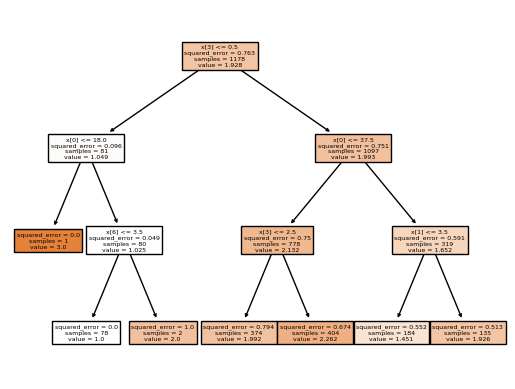

In [25]:
from sklearn import tree # Import the tree classifier

# Fit decision tree:
cart = tree.DecisionTreeRegressor(max_depth=3)
cart = cart.fit(X_train, y_train) # Fit the classifier

# Visualize results:
tree.plot_tree(cart,filled=True)

The terminal nodes range from 1 to 2, which doesn't make sense for the method variable because the numbers are categorical, so there should not be non-integers.


[Text(0.4230769230769231, 0.875, 'x[3] <= 0.5\ngini = 0.649\nsamples = 1178\nvalue = [495, 273, 410]'),
 Text(0.15384615384615385, 0.625, 'x[0] <= 18.0\ngini = 0.048\nsamples = 81\nvalue = [79, 0, 2]'),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.23076923076923078, 0.375, 'x[6] <= 3.5\ngini = 0.025\nsamples = 80\nvalue = [79, 0, 1]'),
 Text(0.15384615384615385, 0.125, 'gini = 0.0\nsamples = 78\nvalue = [78, 0, 0]'),
 Text(0.3076923076923077, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(0.6923076923076923, 0.625, 'x[0] <= 37.5\ngini = 0.656\nsamples = 1097\nvalue = [416, 273, 408]'),
 Text(0.5384615384615384, 0.375, 'x[1] <= 3.5\ngini = 0.643\nsamples = 778\nvalue = [247, 181, 350]'),
 Text(0.46153846153846156, 0.125, 'gini = 0.612\nsamples = 476\nvalue = [173, 74, 229]'),
 Text(0.6153846153846154, 0.125, 'gini = 0.654\nsamples = 302\nvalue = [74, 107, 121]'),
 Text(0.8461538461538461, 0.375, 'x[1] <= 3.5\ngini = 0.603\nsamples

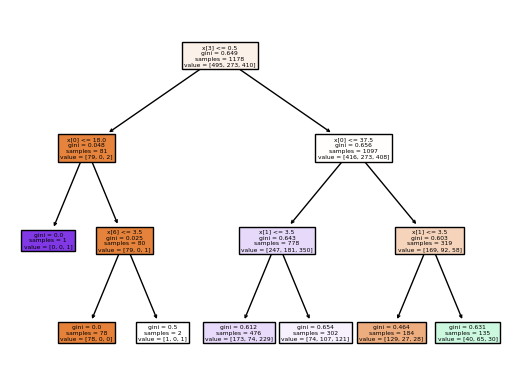

In [34]:
# 4 Classification tree
# Fit decision tree:
model = tree.DecisionTreeClassifier(max_depth=3)
cart = model.fit(X_train, y_train) # Fit the classifier

# Visualize results:
tree.plot_tree(cart,filled=True)


In [16]:
print(data.columns[0])
print(data.columns[3])
print(data.columns[1])
print(data.columns[6])



age
numberChildren
edu
spouse_occupation


4. Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?



This tree looks different as it does not compute squared error, but computes a gini impurity. The variables used are indexes 0, 1, 3, and 6, which are, respectively, age, numberChildren, edu, and spouse_occupation.

The root node considers if x[3], or number of children born, is less than 0.5, there seems to be more instances of either no use method, or long term.

The left child of the root node considers if the wife's age is less than or equal to 18, then there seems to be almost all counts of no-use for contraception. There are child nodes for this considering the husband's occupation which is categorical, but I do not have enough information about the meaning of the values to interpret.

The right child of the root node considers the wife's age <= 37.5. The values are [428, 262, 415] for distribution of methods. One of the child nodes suggest that if the condition x[1] (wife's education) <= 2.5 is satisfied, then the distribution is [244, 168, 347], where as if that is not satisfied, the distribution is [184, 94, 68]. So if the wife's education is higher, there seems to be a lower rate or long term contraception, which is interesting.

5. Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a  3×3  matrix instead of  2×2 .). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.


In [41]:
tab = pd.crosstab(y_test,y_hat) # Compute confusion matrix
acc = (tab.iloc[0,0]+tab.iloc[1,1]) + tab.iloc[2,2]/(tab.iloc[0,0]+tab.iloc[1,1]+tab.iloc[0,1]+tab.iloc[1,0]+tab.iloc[2,0]+ tab.iloc[2,1]+ tab.iloc[2,2]+ tab.iloc[0,2] + tab.iloc[1,2]) # Compute Accuracy
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)


Accuracy:  94.15254237288136 



col_0,1,2,3
method,,,
1,73,20,41
2,16,21,23
3,29,27,45


In [46]:

from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_no_use = sum((y_test == 1) & (y_hat == 1)) / sum(y_test == 1)
accuracy_short_term = sum((y_test == 2) & (y_hat == 2)) / sum(y_test == 2)
accuracy_long_term = sum((y_test == 3) & (y_hat == 3)) / sum(y_test == 3)

#accuracy_no_use = accuracy_score(y_test[y_test == 1], y_hat[y_test == 1])
#accuracy_short_term = accuracy_score(y_test[y_test == 2], y_hat[y_test == 2])
#accuracy_long_term = accuracy_score(y_test[y_test == 3], y_hat[y_test == 3])


# Display the accuracy for each class
print('Accuracy for No-use: ', accuracy_no_use)
print('Accuracy for Long-term: ', accuracy_long_term)
print('Accuracy for Short-term: ', accuracy_short_term)

# I don't think this is correct ;(

Accuracy for No-use:  0.5447761194029851
Accuracy for Long-term:  0.44554455445544555
Accuracy for Short-term:  0.35


It seems like model is more accurate for no-use method, then long-term, and then short-term as the lowest.

6. Why can't you use a linear probability model to do this exercise? Explain clearly in words
- Linear models are better for data with linear relationships. This data has a lot of different categories to compare, so it would be better to use a decision tree for more complex classifications. Linear models also output numerical data, whereas this problem is dealing with predicting categorical relationships.

**Q4.** This is a question where we use regression and regression trees. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running these regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q5.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{eqnarray*}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{eqnarray*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{eqnarray*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{eqnarray*}

which can be written in terms of sample covariance and sample variance as:

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{eqnarray*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
6. Let's return to the question of *outliers*. With your formula for the OLS coefficients $(a^*,b^*)$, explain what happens if you significantly increase a single value of the outcome/target/response variable $y_i$ or one of the predictor/explanatory/covariate variables $x_i$. If values for some extreme observations are exerting significant influence over the regression coefficients, will the model perform well on for more average observations?